# Factors affecting the status of  loan , the interest rate and the loan amount
## by Marwan Mohamed Mohamed Zidan

## Investigation Overview

> in this investigation we will look at the factors that can make a loan fail , also what controls the interest rate of the loan and the loan amount, this will be done through plotting our 3 main features together and with another features like (monthly payment , investors, duration of loan, etc...) which can have effect on the 3 main features 

## Dataset Overview

> The data set consists of 110811 loan records and 11 loan attributes , those attributes include the amount of loan , interest rate , loan status , the duration of loan and etc...

In [46]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [47]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [48]:
# load in the dataset into a pandas dataframe
loan_dataset =pd.read_csv('prosperLoanData.csv')
loan_dataset=loan_dataset[['ListingKey','LoanOriginalAmount',
                         'BorrowerRate','LoanStatus','IncomeRange',
                         'EmploymentStatus','MonthlyLoanPayment','Term','ListingCreationDate'
                        ,'IsBorrowerHomeowner','IncomeVerifiable','Investors'
                        ]]
loan_dataset=loan_dataset.drop_duplicates();
loan_dataset=loan_dataset.dropna()
loan_dataset.shape

(110811, 12)

In [49]:
def setBins( minVal, maxVal, step):
    return np.arange(minVal,maxVal+step,step)

base_color = sb.color_palette()[0]

normal_loans = ["Completed", "Current", "FinalPaymentInProgress"]
def get_loan_type(loan_status):
    if loan_status in normal_loans:
        return 'NormalLoan'
    else:
        return 'FailedLoan'

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Borrower Rate

>The borrower rate in our dataset varies between 0 and 0.35, it is normally distrbuted with a peak at 0.15 and a sudden increase at around 0.32, it shows that there is a wide varity of ratings which depends on other factors 

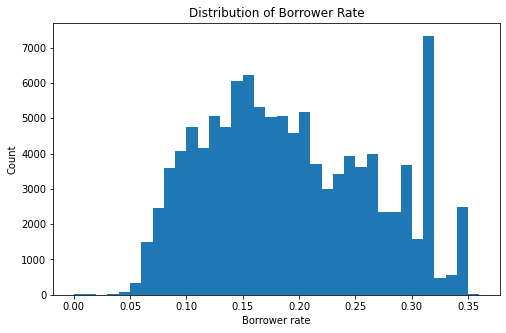

In [50]:
bins = setBins(0,0.36,0.01)
plt.figure(figsize=[8, 5])
plt.title('Distribution of Borrower Rate')
plt.hist(data=loan_dataset,x='BorrowerRate',bins=bins);
plt.xlabel('Borrower rate');
plt.ylabel('Count');

## Distribution of loan amounts

> Loan amount varies from 1000 to 35000 with 4000 as the most chosen value for a loan , most loans take standard values as the graph has alot of peaks with sharp edges , those standard values are (1000, 2000, 3000, 4000, 5000, 10000, 15000, 20000, 25000)

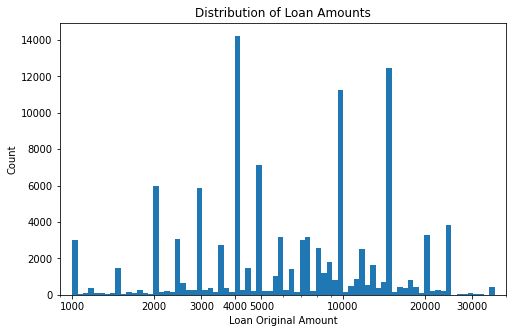

In [51]:
bins = 10**setBins(3,4.6,0.02)
plt.figure(figsize=[8, 5])
plt.hist(data=loan_dataset,x='LoanOriginalAmount',bins=bins);
ticks=[1000,2000,3000,4000,5000,10000,20000,30000]
labels = ['{}'.format(v) for v in ticks]
plt.title('Distribution of Loan Amounts')
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlim((900,40000))
plt.xlabel('Loan Original Amount');
plt.ylabel('Count');

## Effect of Income range on loan status
> To be able to Interpert loan status in an understandable manner we divided the loan status into 2 categories : normal loan and failed loan , where a normal loan is the one that is completed or still ongoing , and then we plotted the loan type with the income range 

> we can see from the graph that people with the highest icnome has less chance of failing their loan , we can see this clearly if we look at the difference between people with 100k ,75-100k and 1-25k income ranges, the people with the highest income has around the same normal to failed loan ratios while people with lower income has much worse ratio



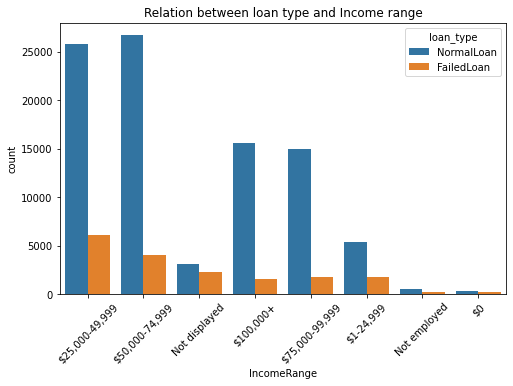

In [52]:
loan_dataset['loan_type'] = loan_dataset['LoanStatus'].apply(get_loan_type)
plt.figure(figsize=[8, 5])
plt.title('Relation between loan type and Income range')
sb.countplot(data = loan_dataset, x = 'IncomeRange', hue = 'loan_type')
plt.xticks(rotation='45');

## Relation between Borrower rate and employment status
>from this graph we can see that employed people has less borrower rate than not employed ones

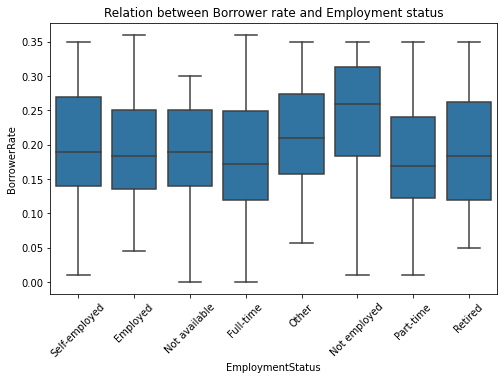

In [53]:
plt.figure(figsize=[8, 5])
sb.boxplot(data=loan_dataset,x='EmploymentStatus',y='BorrowerRate',color=base_color)
plt.title('Relation between Borrower rate and Employment status')
plt.xticks(rotation='45');

## Relation between borrower rate , Loan amount and Loan type

>When we look at the relation between borrower rate and loan amount we can see a negative cooleration , when we add loan type to the plot we notice that most fialed loans lie in top left which indicates high borrower rate and low loan amount , Also the we can see that in borrower rate less than 0.1 or loan amount larger than 25k we can't see any failed loans


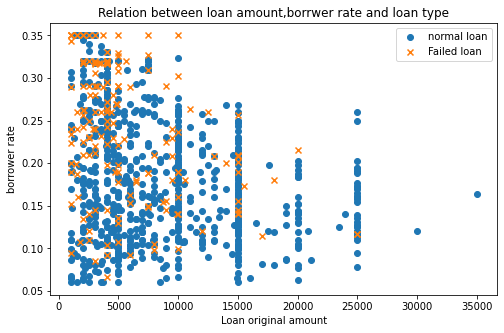

In [54]:
loan_type_markers = [['NormalLoan', 'o'],
               ['FailedLoan', 'x']]
samples = np.random.choice(loan_dataset.shape[0], 1000, replace = False)
loan_dataset_samp = loan_dataset.loc[loan_dataset.index.intersection(samples),:]
plt.figure(figsize=[8, 5])
for loan,marker in loan_type_markers:
    df_loan_type_markers = loan_dataset_samp[loan_dataset_samp['loan_type'] == loan]
    plt.scatter(data = df_loan_type_markers, x = 'LoanOriginalAmount', y = 'BorrowerRate', marker = marker)
plt.title('Relation between loan amount,borrwer rate and loan type')
plt.legend(['normal loan','Failed loan'])
plt.xlabel('Loan original amount')
plt.ylabel('borrower rate');

## Relation between loan amount, investors and monthly payment

>the least monthly payment are located at the bottom left which indicates a small loan amount and less number of investors , but as the loan amount and investors increase the monthly payment also increases

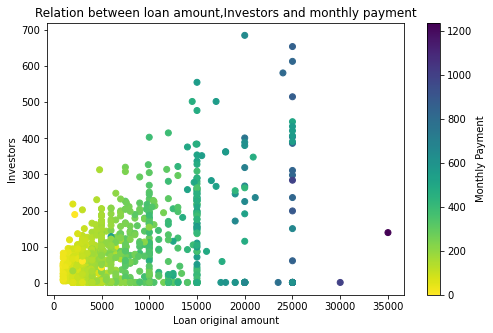

In [55]:
plt.figure(figsize=[8, 5])
plt.scatter(data = loan_dataset_samp, x = 'LoanOriginalAmount', y = 'Investors', c = 'MonthlyLoanPayment',cmap = 'viridis_r'
           
           );
plt.title('Relation between loan amount,Investors and monthly payment')
plt.xlabel('Loan original amount')
plt.ylabel('Investors');
plt.colorbar(label = 'Monthly Payment');